# Wizualizacja danych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
#%matplotlib inline

# Wczytaj dane z pliku

In [2]:
inFile = 'http://ww2.amstat.org/publications/jse/datasets/babyboom.dat.txt'
data = pd.read_csv(inFile, sep='[ ]+', header=None, engine='python',names= ['sex', 'Weight', 'Minutes'])
df = data[['Minutes', 'sex', 'Weight']]

In [4]:
df.head()

,Minutes,sex,Weight
5,5,1,3837
104,64,1,3334
118,78,2,3554
155,115,2,3838
257,177,2,3625


# Narysujmy dane <tt>df.Weight.values</tt> jako szereg czasowy

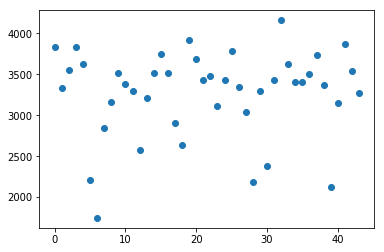

In [5]:
x=df.Weight.values
plt.scatter(np.arange(len(x)), x)
plt.show()

# Narysujmy histogram dla <tt>df.Weight.values</tt>

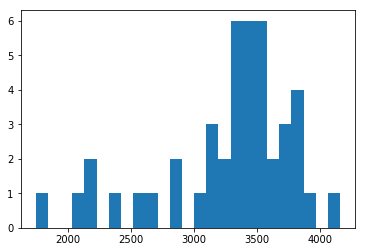

In [17]:
plt.hist(x, bins=25)
plt.show()

# Narysujmy gęstość dla <tt> df.Weight.values</tt> (estymacja jądrowa):

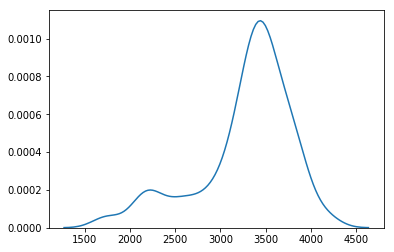

In [18]:
sns.kdeplot(x)
plt.show()

# Narysujmy dystrybuantę empiryczną dla <tt>df.Weight.values</tt>

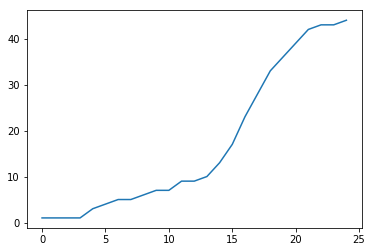

In [8]:
plt.plot(stats.cumfreq(x,numbins=25)[0])
plt.show()

# Narysujmy wykres pudełkowy dla <tt>df.Weight.values</tt>

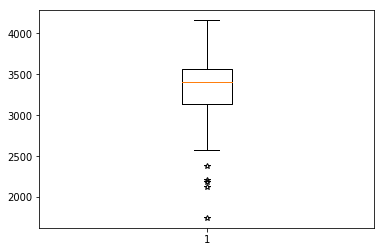

In [20]:
plt.boxplot(x, sym='*')
plt.show()

# Narysujmy wykres skrzypcowy dla <tt>df.Weight.values</tt>

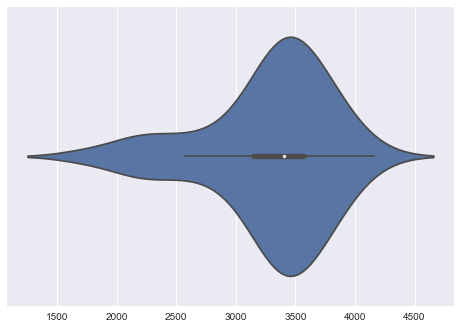

In [9]:
sns.violinplot(x)
plt.show()

# Zadanie
Proszę podzielić próbkę na dwie grupy ze względu na płeć (kolumna ``sex'') i narysować dla nich:
<ul>
<li>wykres w kształcie szeregu czasowego</li>
<li>histogramy</li>
<li>estymacje gęstości</li>
<li>dystrybuanty empiryczne</li>
<li>wykresy pudełkowe</li>
<li>wykresy skrzypcowe</li>
</ul>

In [10]:
# To make the plots easier to read, replace "1/2" with "female/male"
df.sex = df.sex.replace([1,2], ['female', 'male'])

In [11]:
# Display statistical information numerically
grouped = df.groupby('sex')
print(grouped.describe())
print(grouped.get_group('male').Weight.head())
print(grouped.get_group('female').Weight.head())

                  Minutes       Weight
sex                                   
female count    18.000000    18.000000
       mean    773.000000  3132.444444
       std     446.050775   631.582534
       min       5.000000  1745.000000
       25%     507.750000  2711.000000
       50%     846.500000  3381.000000
       75%    1094.250000  3517.250000
       max    1435.000000  3866.000000
male   count    26.000000    26.000000
       mean    799.615385  3375.307692
       std     402.687281   428.046051
       min      78.000000  2121.000000
       25%     464.250000  3198.000000
       50%     849.500000  3404.000000
       75%    1177.500000  3628.750000
       max    1283.000000  4162.000000
118    3554
155    3838
257    3625
422    2846
431    3166
Name: Weight, dtype: int64
5      3837
104    3334
405    2208
407    1745
814    2576
Name: Weight, dtype: int64


# wykres w kształcie "szeregu czasowego"

# estymacje gęstości

# histogramy

# dystrybuanty empiryczne

# wykresy pudełkowe

# wykresy skrzypcowe

# Test: czy próbka pochodzi z rozkładu normalnego 

In [12]:
# Statistics: are the data normally distributed?
def isNormal(data, dataType):
    '''Check if the data are normally distributed'''
    alpha = 0.05
    (k2, pVal) = stats.normaltest(data)
    if pVal < alpha:
        print('{0} are NOT normally distributed.'.format(dataType))
    else:
        print('{0} are normally distributed.'.format(dataType))

In [13]:
isNormal(grouped.get_group('male').Weight, 'male')
isNormal(grouped.get_group('female').Weight, 'female')

male are NOT normally distributed.
female are normally distributed.


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
